In [60]:
import pandas as pd

import missingno as msno

from fuzzywuzzy import fuzz
from collections import defaultdict
import numpy as np
from collections import defaultdict
import gender_guesser.detector as gender
from translate import Translator

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, roc_auc_score

In [2]:
test = pd.read_csv('df_test+.csv')
train = pd.read_csv('df_train+.csv')

In [3]:
test

,Unnamed: 0,uuid_vocancy,uuid_resume,first_name,last_name,birth_date,country,city,about,key_skills,...,educationItem_faculty,educationItem_specialty,educationItem_result,educationItem_education_type,educationItem_education_level,flag,name_vocancy,keywords_vocancy,description_vocancy,comment_vocancy
0,0,779f3a59-206a-3241-adc4-d7db504f960b,74392e00-ecfb-335b-9fc1-c2652dca06e5,Данила,Прохоров,1979-01-01,Россия,Санкт-Петербург,NaN,"Java, Spring Boot, Java EE, SQL, Hibernate, Gi...",...,Информатики и систем управления,NaN,NaN,Основное,Высшее,0,NaN,NaN,NaN,NaN
1,1,779f3a59-206a-3241-adc4-d7db504f960b,2b5ad5e1-1f31-3f3f-8a66-43cd89233672,Савва,Исаев,1991-01-01,Россия,Москва,"(Гражданин Республики Казахстан, по России им...","ООП, Java, Java Spring Framework, Функциональн...",...,Заочный,NaN,Бакалавр вычислительной техники и программного...,Основное,Высшее,0,NaN,NaN,NaN,NaN
2,2,779f3a59-206a-3241-adc4-d7db504f960b,ea1ac51a-e16b-367a-9216-52fb64809db1,Николай,Новиков,1986-12-08,Россия,NaN,"С 1999 года, после появления дома первого ком...","Java, Spring Framework, Hibernate ORM, SQL, Ja...",...,"Математики и компьютерных наук,Таможенное дело",Специалист в области компьютерной графики и We...,NaN,"Основное,Основное,Повышение квалификации","Высшее,Высшее,None",0,NaN,NaN,NaN,NaN
3,3,779f3a59-206a-3241-adc4-d7db504f960b,ecfc02a1-592c-3ed0-a801-1ad9ab3d30b8,Гавриил,Новикова,1985-10-13,Россия,Новосибирск,"- Oracle Certified Associate, Java SE 7 Progra...","Java, Git, SQL, HTML, JavaScript, CSS, MySQL, ...",...,"Экономический,ФИТ","Математические методы в экономике,Информатика ...",NaN,"Основное,Основное","Высшее,Высшее",0,NaN,NaN,NaN,NaN
4,4,779f3a59-206a-3241-adc4-d7db504f960b,aff6b6bd-89c2-3b2c-ab2e-0b9f76ac367c,Ярослава,Тихонова,1992-07-28,Россия,Тюмень,NaN,"Java, Spring, Git, PostgreSQL, Hibernate ORM, ...",...,ИУ,Информационная безопасность автоматизированных...,NaN,Основное,Высшее,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,82df355a-235e-3046-9e6e-782ddf1600eb,Кристина,Яковлева,1995-06-17,Россия,Москва,NaN,NaN,...,Экономики и Менеджмента,NaN,NaN,Основное,Высшее,1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN
572,572,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,915597ce-24e5-31fa-8dca-29437f49f839,Аполлон,Белякова,1987-01-01,Россия,Мураши,Более 10 лет разработки приложений Windows и ...,"Java Servlets, Hibernate ORM, SOAP, REST, Spri...",...,Прикладная информатика,NaN,NaN,Основное,Бакалавр,1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN
573,573,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,f288a532-0b58-30cb-ac3c-f87e53984719,Клавдия,Пономарёв,1984-11-22,Россия,Москва,В свободное время люблю путешествовать с семьё...,"Ответственность, Коммуникабельность, Аналитиче...",...,"Прикладная информатика,Менеджмент","Прикладная информатика в экономике,Менеджмент ...",NaN,"Основное,Основное","Высшее,Высшее",1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN
574,574,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,3e3a379f-226e-305e-b7d8-cf341e00cbd7,Фёдор,Харитонова,1993-06-20,Турция,Анталия,Поиск нового места работы всегда был довольно ...,"Linux, Apache Maven, Java Collections, Java EE...",...,Диплом специалиста по инженерной специальности...,NaN,NaN,Основное,Высшее,1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN


In [4]:
train

,Unnamed: 0,uuid_vocancy,uuid_resume,first_name,last_name,birth_date,country,city,about,key_skills,...,educationItem_faculty,educationItem_specialty,educationItem_result,educationItem_education_type,educationItem_education_level,flag,name_vocancy,keywords_vocancy,description_vocancy,comment_vocancy
0,0,779f3a59-206a-3241-adc4-d7db504f960b,74392e00-ecfb-335b-9fc1-c2652dca06e5,Данила,Прохоров,1979-01-01,Россия,Санкт-Петербург,NaN,"Java, Spring Boot, Java EE, SQL, Hibernate, Gi...",...,Информатики и систем управления,NaN,NaN,Основное,Высшее,0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки
1,1,779f3a59-206a-3241-adc4-d7db504f960b,2b5ad5e1-1f31-3f3f-8a66-43cd89233672,Савва,Исаев,1991-01-01,Россия,Москва,"(Гражданин Республики Казахстан, по России им...","ООП, Java, Java Spring Framework, Функциональн...",...,Заочный,NaN,Бакалавр вычислительной техники и программного...,Основное,Высшее,0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки
2,2,779f3a59-206a-3241-adc4-d7db504f960b,ea1ac51a-e16b-367a-9216-52fb64809db1,Николай,Новиков,1986-12-08,Россия,NaN,"С 1999 года, после появления дома первого ком...","Java, Spring Framework, Hibernate ORM, SQL, Ja...",...,"Математики и компьютерных наук,Таможенное дело",Специалист в области компьютерной графики и We...,NaN,"Основное,Основное,Повышение квалификации","Высшее,Высшее,None",0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки
3,3,779f3a59-206a-3241-adc4-d7db504f960b,ecfc02a1-592c-3ed0-a801-1ad9ab3d30b8,Гавриил,Новикова,1985-10-13,Россия,Новосибирск,"- Oracle Certified Associate, Java SE 7 Progra...","Java, Git, SQL, HTML, JavaScript, CSS, MySQL, ...",...,"Экономический,ФИТ","Математические методы в экономике,Информатика ...",NaN,"Основное,Основное","Высшее,Высшее",0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки
4,4,779f3a59-206a-3241-adc4-d7db504f960b,aff6b6bd-89c2-3b2c-ab2e-0b9f76ac367c,Ярослава,Тихонова,1992-07-28,Россия,Тюмень,NaN,"Java, Spring, Git, PostgreSQL, Hibernate ORM, ...",...,ИУ,Информационная безопасность автоматизированных...,NaN,Основное,Высшее,0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,259bf318-e6a7-3b6c-93f9-e1804a89ee63,2ddef29c-dd38-33d9-b046-7099a548c570,Альбина,Мясникова,1995-01-01,Россия,Тула,NaN,"JavaScript, TypeScript, Vue.js, Nuxt.js, Node....",...,Информационных технологий,NaN,Бизнес-информатика,Основное,Высшее,1,Frontend Developer,NaN,"-бренд одежды и аксессуаров, созданный в 2008...",NaN
652,652,259bf318-e6a7-3b6c-93f9-e1804a89ee63,88779779-a59e-3580-b451-77f40ecd6c0e,Аким,Семёнова,1988-11-14,Россия,Пенза,NaN,"JavaScript, TypeScript, Vue js, Nuxt, HTML, CS...",...,Факультет вычислительной техники,Инженер программист,NaN,Основное,Высшее,1,Frontend Developer,NaN,"-бренд одежды и аксессуаров, созданный в 2008...",NaN
653,653,259bf318-e6a7-3b6c-93f9-e1804a89ee63,3c418fd4-8956-31e3-a5ef-f638f6eac0c9,Матвей,Константинов,1992-06-02,Россия,Тула,NaN,"JavaScript, TypeScript, Vue.js, Nuxt, Nest, No...",...,Техники и технологии,Конструкторско-технологическое обеспечение авт...,NaN,Основное,Высшее,1,Frontend Developer,NaN,"-бренд одежды и аксессуаров, созданный в 2008...",NaN
654,654,259bf318-e6a7-3b6c-93f9-e1804a89ee63,253cac7a-6788-359a-b10a-c444dcfc049e,Руслан,Нестеров,2000-01-01,Россия,Санкт-Петербург,"Профессиональные навыки: • JavaScript, базовы...","JavaScript, TypeScript, Vue.js, Nuxt.js, Автом...",...,Разработчик WEB и мультимедийных систем,NaN,"Computer Science, Паттерны проектирования, Тес...",Повышение квалификации,None,1,Frontend Developer,NaN,"-бренд одежды и аксессуаров, созданный в 2008...",NaN


In [5]:
train.shape

(656, 27)

In [6]:
test.shape

(576, 27)

In [7]:
train_info = pd.DataFrame({
    "DataType": train.dtypes,
    "MissingValues": train.isnull().sum(),
    "UniqueValues": train.nunique()
}).sort_values(by="MissingValues", ascending=False)

train_info['MissingValuesRatio'] = round(train_info['MissingValues'] / len(train),2)

train_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
keywords_vocancy,float64,656,0,1.00
comment_vocancy,object,589,4,0.90
educationItem_result,object,449,176,0.68
about,object,379,238,0.58
educationItem_specialty,object,292,283,0.45
birth_date,object,120,323,0.18
educationItem_faculty,object,103,437,0.16
educationItem_organization,object,89,447,0.14
key_skills,object,53,502,0.08
educationItem_year,object,51,265,0.08


In [8]:
test_info = pd.DataFrame({
    "DataType": test.dtypes,
    "MissingValues": test.isnull().sum(),
    "UniqueValues": test.nunique()
}).sort_values(by="MissingValues", ascending=False)

test_info['MissingValuesRatio'] = round(test_info['MissingValues'] / len(test),2)

test_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
comment_vocancy,float64,576,0,1.00
description_vocancy,object,463,1,0.80
keywords_vocancy,object,463,1,0.80
name_vocancy,object,463,1,0.80
educationItem_result,object,417,141,0.72
about,object,336,218,0.58
educationItem_specialty,object,273,245,0.47
educationItem_faculty,object,103,390,0.18
birth_date,object,95,316,0.16
educationItem_organization,object,82,410,0.14


In [9]:
train['birth_date'] = pd.to_datetime(train['birth_date'])

In [10]:
test['birth_date'] = pd.to_datetime(test['birth_date'])

In [11]:
train = train.dropna(subset=['country'])

In [12]:
test = test.dropna(subset=['country'])

In [13]:
train['country'].unique()

array(['Россия', 'Russia', 'Таиланд', 'Georgia', 'Испания', 'Белоруссия'],
      dtype=object)

In [14]:
test['country'].unique()

array(['Россия', 'Russia', 'Армения', 'Казахстан ', 'ОАЭ', 'Казахстан',
       'Грузия', 'Киргизия', 'Кипр', 'Малайзия', 'Турция ', 'Турция'],
      dtype=object)

In [15]:
train['country'] = train['country'].replace({'Russia': 'Россия', 'Georgia': 'Грузия'})
test['country'] = test['country'].replace({'Russia': 'Россия'})

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\3726717220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['country'] = train['country'].replace({'Russia': 'Россия', 'Georgia': 'Грузия'})
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\3726717220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['country'] = test['country'].replace({'Russia': 'Россия'})


In [16]:
train['city'].unique()

array(['Санкт-Петербург', 'Москва', nan, 'Новосибирск', 'Тюмень', 'Пенза',
       ' Балашиха', 'Омск', 'Краснодар', 'Самара', 'Долгопрудный',
       'Пермь', 'Красногорск', 'Воронеж', 'Казань', 'Калининград',
       'Челябинск', 'Смоленск', 'Ростов-на-Дону', 'Михайловск',
       'Екатеринбург', 'Кемерово', 'Нижний Новгород', 'Уфа', 'Псков',
       'Ульяновск', 'Раменское', 'Улан-Удэ', 'Протвино', 'Владивосток',
       'Moscow', 'Балашиха', 'Димитровград', 'Иннополис', 'Томск',
       'Тольятти', 'Ижевск', 'Волжский', 'Клин', 'Рязань',
       'Волжский (Волгоградская область)', 'Якутск', 'Вологда', 'Истра',
       'Солнечногорск', 'Барнаул', 'Нижний Новгород ', 'Тула', 'Саранск',
       'Рыбинск', 'Зеленоград', 'Дубна', 'Ярославль', 'Донецк',
       'Подольск (Московская область)', 'Иркутск', 'Владикавказ',
       ' Москва', 'Грозный', 'Назрань', 'Армянск', 'Прохладный', 'Саки',
       'Минеральные Воды', 'Трехгорный', 'Краснодар ', 'Таганрог',
       'Саратов', 'Сочи', 'Новороссийск', 

In [17]:
test['city'].unique()

array(['Санкт-Петербург', 'Москва', nan, 'Новосибирск', 'Тюмень', 'Пенза',
       ' Балашиха', 'Омск', 'Краснодар', 'Самара', 'Долгопрудный',
       'Пермь', 'Красногорск', 'Воронеж', 'Казань', 'Калининград',
       'Челябинск', 'Смоленск', 'Ростов-на-Дону', 'Михайловск',
       'Екатеринбург', 'Кемерово', 'Нижний Новгород', 'Уфа', 'Псков',
       'Ульяновск', 'Раменское', 'Улан-Удэ', 'Протвино', 'Владивосток',
       'Moscow', 'Балашиха', 'Димитровград', 'Иннополис', 'Томск',
       'Тольятти', 'Ижевск', 'Волжский', 'Клин', 'Рязань',
       'Волжский (Волгоградская область)', 'Якутск', 'Вологда', 'Истра',
       'Солнечногорск', 'Барнаул', 'Нижний Новгород ', 'Тула', 'Саранск',
       'Рыбинск', 'Зеленоград', 'Дубна', 'Ярославль', 'Донецк',
       'Подольск (Московская область)', 'Иркутск', 'Владикавказ',
       ' Москва', 'Грозный', 'Назрань', 'Армянск', 'Прохладный', 'Саки',
       'Минеральные Воды', 'Трехгорный', 'Краснодар ', 'Таганрог',
       'Саратов', 'Сочи', 'Новороссийск', 

In [18]:
train['city'] = train['city'].str.strip()
train['city'] = train['city'].replace({'Tolyatti': 'Тольяти', 'Moscow': 'Москва'})

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2262532853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['city'] = train['city'].str.strip()
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2262532853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['city'] = train['city'].replace({'Tolyatti': 'Тольяти', 'Moscow': 'Москва'})


In [19]:
test['city'] = test['city'].str.strip()
test['city'] = test['city'].replace({'Tolyatti': 'Тольяти', 'Moscow': 'Москва'})

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2510369857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['city'] = test['city'].str.strip()
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2510369857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['city'] = test['city'].replace({'Tolyatti': 'Тольяти', 'Moscow': 'Москва'})


In [20]:
train['city'].unique()

array(['Санкт-Петербург', 'Москва', nan, 'Новосибирск', 'Тюмень', 'Пенза',
       'Балашиха', 'Омск', 'Краснодар', 'Самара', 'Долгопрудный', 'Пермь',
       'Красногорск', 'Воронеж', 'Казань', 'Калининград', 'Челябинск',
       'Смоленск', 'Ростов-на-Дону', 'Михайловск', 'Екатеринбург',
       'Кемерово', 'Нижний Новгород', 'Уфа', 'Псков', 'Ульяновск',
       'Раменское', 'Улан-Удэ', 'Протвино', 'Владивосток', 'Димитровград',
       'Иннополис', 'Томск', 'Тольятти', 'Ижевск', 'Волжский', 'Клин',
       'Рязань', 'Волжский (Волгоградская область)', 'Якутск', 'Вологда',
       'Истра', 'Солнечногорск', 'Барнаул', 'Тула', 'Саранск', 'Рыбинск',
       'Зеленоград', 'Дубна', 'Ярославль', 'Донецк',
       'Подольск (Московская область)', 'Иркутск', 'Владикавказ',
       'Грозный', 'Назрань', 'Армянск', 'Прохладный', 'Саки',
       'Минеральные Воды', 'Трехгорный', 'Таганрог', 'Саратов', 'Сочи',
       'Новороссийск', 'Белгород', 'Анапа', 'Ростов на Дону', 'Оренбург',
       'Симферополь', 'П

In [21]:
test['city'].unique()

array(['Санкт-Петербург', 'Москва', nan, 'Новосибирск', 'Тюмень', 'Пенза',
       'Балашиха', 'Омск', 'Краснодар', 'Самара', 'Долгопрудный', 'Пермь',
       'Красногорск', 'Воронеж', 'Казань', 'Калининград', 'Челябинск',
       'Смоленск', 'Ростов-на-Дону', 'Михайловск', 'Екатеринбург',
       'Кемерово', 'Нижний Новгород', 'Уфа', 'Псков', 'Ульяновск',
       'Раменское', 'Улан-Удэ', 'Протвино', 'Владивосток', 'Димитровград',
       'Иннополис', 'Томск', 'Тольятти', 'Ижевск', 'Волжский', 'Клин',
       'Рязань', 'Волжский (Волгоградская область)', 'Якутск', 'Вологда',
       'Истра', 'Солнечногорск', 'Барнаул', 'Тула', 'Саранск', 'Рыбинск',
       'Зеленоград', 'Дубна', 'Ярославль', 'Донецк',
       'Подольск (Московская область)', 'Иркутск', 'Владикавказ',
       'Грозный', 'Назрань', 'Армянск', 'Прохладный', 'Саки',
       'Минеральные Воды', 'Трехгорный', 'Таганрог', 'Саратов', 'Сочи',
       'Новороссийск', 'Белгород', 'Анапа', 'Ростов на Дону', 'Оренбург',
       'Симферополь', 'П

In [22]:
def replace_yo(df):
    for column in df.columns:
        # Проверяем тип данных в колонке, применяем замену только к строкам
        if df[column].dtype == object:
            df[column] = df[column].apply(lambda x: x.replace('ё', 'е') if isinstance(x, str) else x)
    return df
train = replace_yo(train)
test = replace_yo(test)

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\3234749343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].apply(lambda x: x.replace('ё', 'е') if isinstance(x, str) else x)


In [23]:
train['key_skills'].unique()

array(['Java, Spring Boot, Java EE, SQL, Hibernate, Git, Docker, Высоконагруженные системы, PostgreSQL, Linux',
       'ООП, Java, Java Spring Framework, Функциональное программирование, Разработка программного обеспечения, Многопоточность, Kotlin, MySQL, Docker, Linux',
       'Java, Spring Framework, Hibernate ORM, SQL, Java, JUnit, MapStruct, REST, Apache Maven, Git, Docker, OpenShift, Bitbucket, Jira, Confluence, Camunda, Kafka, Mockito, WireMock, Webflux, ELK stack, TeamCity',
       'Java, Git, SQL, HTML, JavaScript, CSS, MySQL, ООП, Linux, Spring Framework, XML, Atlassian Jira, Android, jQuery, Apache Maven, Bootstrap, Ajax, MVC, Angular, Node.js, Reactive Development (Reactor, RxJava), Hibernate ORM, Kubernetes, ArgoCD, Ext JS',
       'Java, Spring, Git, PostgreSQL, Hibernate ORM, BPMN, RabbitMQ',
       'Java, Git, SQL, REST, Hibernate ORM, PostgreSQL, LiquiBase, Apache Maven, Swagger, JUnit, Atlassian Jira, Spring Framework, Spring Security, Spring Data, Spring MVC, Docker, 

In [24]:
def unified_skill_processing(df, column_name):
    def process_skill_string(skill_string):
        if pd.isna(skill_string):
            return ''
        
        skill_string = skill_string.lower()
        
        replacements = {
            r'\b(?:sql)\b': 'sql',
            r'\b(?:git|github|gitlab)\b': 'git',
            r'\bjira\b': 'jira',
            r'\ba\/b\b': 'a/b',
            r'\b1c\b': '1c',
            r'\bpowerpoint\b': 'powerpoint',
            r'\bexcel\b': 'excel'
        }
        
        for pattern, replacement in replacements.items():
            skill_string = re.sub(pattern, replacement, skill_string, flags=re.IGNORECASE)
        
        skill_string = re.sub(r'\(', ', ', skill_string)
        skill_string = re.sub(r'\)', ', ', skill_string)
        
        skill_string = re.sub(r',\s*,', ', ', skill_string)
        skill_string = re.sub(r'\s*,\s*', ', ', skill_string)
        
        skill_string = skill_string.strip(', ')
        
        unique_skills = list(dict.fromkeys(skill.strip() for skill in skill_string.split(',') if skill.strip()))
        
        return ', '.join(unique_skills)

    df[column_name] = df[column_name].apply(process_skill_string)


unified_skill_processing(train, 'key_skills')
unified_skill_processing(test, 'key_skills')

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\188650017.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(process_skill_string)


In [25]:
train['key_skills'].unique()

array(['java, spring boot, java ee, sql, hibernate, git, docker, высоконагруженные системы, postgresql, linux',
       'ооп, java, java spring framework, функциональное программирование, разработка программного обеспечения, многопоточность, kotlin, mysql, docker, linux',
       'java, spring framework, hibernate orm, sql, junit, mapstruct, rest, apache maven, git, docker, openshift, bitbucket, jira, confluence, camunda, kafka, mockito, wiremock, webflux, elk stack, teamcity',
       'java, git, sql, html, javascript, css, mysql, ооп, linux, spring framework, xml, atlassian jira, android, jquery, apache maven, bootstrap, ajax, mvc, angular, node.js, reactive development, reactor, rxjava, hibernate orm, kubernetes, argocd, ext js',
       'java, spring, git, postgresql, hibernate orm, bpmn, rabbitmq',
       'java, git, sql, rest, hibernate orm, postgresql, liquibase, apache maven, swagger, junit, atlassian jira, spring framework, spring security, spring data, spring mvc, docker, kafka, 

In [26]:
unique_skills = set()
train['key_skills'].str.split(', ').apply(unique_skills.update)

# Функция для определения доли соответствия стека навыков в описании вакансии
def match_skills_ratio(description, skills_set):
    description_skills = set(description.lower().replace(',', '').split())
    matched_skills = description_skills.intersection(skills_set)
    if not description_skills:
        return 0  # избегаем деления на ноль
    return len(matched_skills) / len(description_skills)

# Применяем функцию к DataFrame и создаем новую колонку с долей соответствия стека
train['доля_соответствия_стека'] = train['description_vocancy'].apply(match_skills_ratio, skills_set=unique_skills)


print(train[['description_vocancy', 'доля_соответствия_стека']])

                                   description_vocancy  \
0     Описание Мы расширяем команды и ищем разработ...   
1     Описание Мы расширяем команды и ищем разработ...   
2     Описание Мы расширяем команды и ищем разработ...   
3     Описание Мы расширяем команды и ищем разработ...   
4     Описание Мы расширяем команды и ищем разработ...   
..                                                 ...   
651   -бренд одежды и аксессуаров, созданный в 2008...   
652   -бренд одежды и аксессуаров, созданный в 2008...   
653   -бренд одежды и аксессуаров, созданный в 2008...   
654   -бренд одежды и аксессуаров, созданный в 2008...   
655   -бренд одежды и аксессуаров, созданный в 2008...   

     доля_соответствия_стека  
0                   0.070707  
1                   0.070707  
2                   0.070707  
3                   0.070707  
4                   0.070707  
..                       ...  
651                 0.053797  
652                 0.053797  
653                 0.05

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2529247926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['доля_соответствия_стека'] = train['description_vocancy'].apply(match_skills_ratio, skills_set=unique_skills)


In [27]:
def match_skills_ratio(description, skills_set):
    # Проверяем, что description не NaN и является строкой
    if pd.isna(description) or not isinstance(description, str):
        return 0  # Если значение не является строкой, возвращаем 0
    
    description_skills = set(description.lower().replace(',', '').split())
    matched_skills = description_skills.intersection(skills_set)
    
    if not description_skills:
        return 0  # избегаем деления на ноль
    return len(matched_skills) / len(description_skills)

In [28]:
test['доля_соответствия_стека'] = test['description_vocancy'].apply(match_skills_ratio, skills_set=unique_skills)
train['доля_соответствия_стека'] = train['description_vocancy'].apply(match_skills_ratio, skills_set=unique_skills)


C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2796027577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['доля_соответствия_стека'] = test['description_vocancy'].apply(match_skills_ratio, skills_set=unique_skills)
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2796027577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['доля_соответствия_стека'] = train['description_vocancy'].apply(match_skills_ratio, skills_set=unique_skills)


In [29]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    if pd.isna(text):
        return set()
    text = str(text).lower() 
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенизация
    tokens = word_tokenize(text)
    # Удаление стоп-слов (опционально)
    tokens = [word for word in tokens if word not in stopwords.words('russian')]
    return set(tokens)

def has_common_words(position, vacancy):
    position_words = preprocess_text(position)
    vacancy_words = preprocess_text(vacancy)
    # Проверка пересечения множеств слов
    common_words = position_words.intersection(vacancy_words)
    return 1 if common_words else 0

# Предполагая, что у вас есть DataFrame'ы train и test с колонками 'experienceItem_position' и 'name_vacancy'
# Применяем функцию к DataFrame
test['соответствие_предыдущей_должности_вакансии'] = test.apply(lambda x: has_common_words(x['experienceItem_position'], x['name_vocancy']), axis=1)
train['соответствие_предыдущей_должности_вакансии'] = train.apply(lambda x: has_common_words(x['experienceItem_position'], x['name_vocancy']), axis=1)

# Выводим результаты
test[['experienceItem_position', 'name_vocancy', 'соответствие_предыдущей_должности_вакансии']]
train[['experienceItem_position', 'name_vocancy', 'соответствие_предыдущей_должности_вакансии']]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Юля\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Юля\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\3048170309.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['соответствие_предыдущей_должности_вакансии'] = test.apply(lambda x: has_common_words(x['experienceItem_position'], x['name_vocancy']), axis=1)
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\3048170309.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,experienceItem_position,name_vocancy,соответствие_предыдущей_должности_вакансии
0,"Ведущий инженер-программист,Главный инженер-пр...",Java разработчик команда Инвестиции,0
1,"Начальник отдела java разработки,Программист 1...",Java разработчик команда Инвестиции,1
2,"Java Developer,Java Developer",Java разработчик команда Инвестиции,1
3,Senior Java Developer,Java разработчик команда Инвестиции,1
4,"Java-разработчик,Java-разработчик",Java разработчик команда Инвестиции,0
...,...,...,...
651,"Старший fronend-разработчик,Frontend-разработч...",Frontend Developer,0
652,"Frontend-разработчик,Frontend разработчик,Fron...",Frontend Developer,0
653,"Senior Fullstack Developer,Senior Frontend Dev...",Frontend Developer,1
654,"Frontend разработчик,Ведущий Frontend разработ...",Frontend Developer,1


In [30]:
test

,Unnamed: 0,uuid_vocancy,uuid_resume,first_name,last_name,birth_date,country,city,about,key_skills,...,educationItem_result,educationItem_education_type,educationItem_education_level,flag,name_vocancy,keywords_vocancy,description_vocancy,comment_vocancy,доля_соответствия_стека,соответствие_предыдущей_должности_вакансии
0,0,779f3a59-206a-3241-adc4-d7db504f960b,74392e00-ecfb-335b-9fc1-c2652dca06e5,Данила,Прохоров,1979-01-01,Россия,Санкт-Петербург,NaN,"java, spring boot, java ee, sql, hibernate, gi...",...,NaN,Основное,Высшее,0,NaN,NaN,NaN,NaN,0.000000,0
1,1,779f3a59-206a-3241-adc4-d7db504f960b,2b5ad5e1-1f31-3f3f-8a66-43cd89233672,Савва,Исаев,1991-01-01,Россия,Москва,"(Гражданин Республики Казахстан, по России им...","ооп, java, java spring framework, функциональн...",...,Бакалавр вычислительной техники и программного...,Основное,Высшее,0,NaN,NaN,NaN,NaN,0.000000,0
2,2,779f3a59-206a-3241-adc4-d7db504f960b,ea1ac51a-e16b-367a-9216-52fb64809db1,Николай,Новиков,1986-12-08,Россия,NaN,"С 1999 года, после появления дома первого ком...","java, spring framework, hibernate orm, sql, ju...",...,NaN,"Основное,Основное,Повышение квалификации","Высшее,Высшее,None",0,NaN,NaN,NaN,NaN,0.000000,0
3,3,779f3a59-206a-3241-adc4-d7db504f960b,ecfc02a1-592c-3ed0-a801-1ad9ab3d30b8,Гавриил,Новикова,1985-10-13,Россия,Новосибирск,"- Oracle Certified Associate, Java SE 7 Progra...","java, git, sql, html, javascript, css, mysql, ...",...,NaN,"Основное,Основное","Высшее,Высшее",0,NaN,NaN,NaN,NaN,0.000000,0
4,4,779f3a59-206a-3241-adc4-d7db504f960b,aff6b6bd-89c2-3b2c-ab2e-0b9f76ac367c,Ярослава,Тихонова,1992-07-28,Россия,Тюмень,NaN,"java, spring, git, postgresql, hibernate orm, ...",...,NaN,Основное,Высшее,0,NaN,NaN,NaN,NaN,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,82df355a-235e-3046-9e6e-782ddf1600eb,Кристина,Яковлева,1995-06-17,Россия,Москва,NaN,,...,NaN,Основное,Высшее,1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN,0.099415,1
572,572,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,915597ce-24e5-31fa-8dca-29437f49f839,Аполлон,Белякова,1987-01-01,Россия,Мураши,Более 10 лет разработки приложений Windows и ...,"java servlets, hibernate orm, soap, rest, spri...",...,NaN,Основное,Бакалавр,1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN,0.099415,1
573,573,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,f288a532-0b58-30cb-ac3c-f87e53984719,Клавдия,Пономарев,1984-11-22,Россия,Москва,В свободное время люблю путешествовать с семье...,"ответственность, коммуникабельность, аналитиче...",...,NaN,"Основное,Основное","Высшее,Высшее",1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN,0.099415,1
574,574,8b9c8d16-c7f0-38a2-b80c-d94030c15a6f,3e3a379f-226e-305e-b7d8-cf341e00cbd7,Федор,Харитонова,1993-06-20,Турция,Анталия,Поиск нового места работы всегда был довольно ...,"linux, apache maven, java collections, java ee...",...,NaN,Основное,Высшее,1,Java разработчик,"Kafka, Java, RxJava, Hystrix, MongoDB",Требования: 4+ года опыта работы с Java 8+ или...,NaN,0.099415,1


In [31]:
def calculate_age(birth_date):
    birth_date = pd.to_datetime(birth_date)
    today = pd.to_datetime('today')
    return today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))

test['age'] = test['birth_date'].apply(calculate_age)
train['age'] = train['birth_date'].apply(calculate_age)

C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2085004038.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['age'] = test['birth_date'].apply(calculate_age)
C:\Users\Юля\AppData\Local\Temp\ipykernel_15652\2085004038.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['age'] = train['birth_date'].apply(calculate_age)


In [32]:
one_hot_encoded = pd.get_dummies(train['country'], prefix='country')
train = pd.concat([train, one_hot_encoded], axis=1)

In [33]:
one_hot_encoded = pd.get_dummies(test['country'], prefix='country')
test = pd.concat([test, one_hot_encoded], axis=1)

In [34]:
from datetime import datetime

def classify_education_years(years_str):
    current_year = datetime.now().year
    
    # Проверяем, является ли years_str строкой
    if not isinstance(years_str, str):
        return None  # Возвращаем None для нестроковых значений
    
    years = [int(year) for year in years_str.split(',') if year.isdigit()]
    statuses = ['недавно', 'средне', 'давно']
    
    if not years:
        return None
    
    recent_years = [year for year in years if current_year - year < 5]
    if recent_years:
        return statuses[0]
    
    middle_years = [year for year in years if 5 <= current_year - year <= 10]
    if middle_years:
        return statuses[1]
    
    return statuses[2]

# Предполагая, что у вас есть DataFrame'ы train и test с колонкой 'educationItem_year'
train['education_status'] = train['educationItem_year'].apply(classify_education_years)
test['education_status'] = test['educationItem_year'].apply(classify_education_years)


In [35]:
from sklearn.preprocessing import LabelEncoder

# Инициализируем LabelEncoder
label_encoder = LabelEncoder()

# Предполагаем, что колонка education_status уже заполнена значениями 'недавно', 'средне', 'давно'
# Применяем Label Encoding к колонке education_status
train['education_year_later_encoded'] = label_encoder.fit_transform(train['education_status'])
test['education_year_later_encoded'] = label_encoder.transform(test['education_status'])

In [36]:
pd.set_option('display.max_columns', None)  # Установка отображения всех колонок
train.head(5)

,Unnamed: 0,uuid_vocancy,uuid_resume,first_name,last_name,birth_date,country,city,about,key_skills,experienceItem_employer,experienceItem_city,experienceItem_position,experienceItem_description,experienceItem_sum_time,educationItem_year,educationItem_organization,educationItem_faculty,educationItem_specialty,educationItem_result,educationItem_education_type,educationItem_education_level,flag,name_vocancy,keywords_vocancy,description_vocancy,comment_vocancy,доля_соответствия_стека,соответствие_предыдущей_должности_вакансии,age,country_Белоруссия,country_Грузия,country_Испания,country_Россия,country_Таиланд,education_status,education_year_later_encoded
0,0,779f3a59-206a-3241-adc4-d7db504f960b,74392e00-ecfb-335b-9fc1-c2652dca06e5,Данила,Прохоров,1979-01-01,Россия,Санкт-Петербург,NaN,"java, spring boot, java ee, sql, hibernate, gi...","МФО ХмельИнфоОрион,МКК РадиоITАсбоцементМаш,ОА...","Можайск,Ступино,Павловский Посад,Луховицы,Можайск","Ведущий инженер-программист,Главный инженер-пр...",Интеграционные адаптеры для передачи заявок п...,10.147945,1999,СибГАУ,Информатики и систем управления,NaN,NaN,Основное,Высшее,0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки,0.070707,0,45.0,0,0,0,1,0,давно,0
1,1,779f3a59-206a-3241-adc4-d7db504f960b,2b5ad5e1-1f31-3f3f-8a66-43cd89233672,Савва,Исаев,1991-01-01,Россия,Москва,"(Гражданин Республики Казахстан, по России им...","ооп, java, java spring framework, функциональн...","МФО Вод,МФО ВостокУрал,МКК Газ,ОАО МонтажИнфоI...","Шаховская,Воскресенск,Раменское,Наро-Фоминск,Д...","Начальник отдела java разработки,Программист 1...",Разработка программного комплекса кредитного ...,9.246575,2014,АИНГ-Атырау,Заочный,NaN,Бакалавр вычислительной техники и программного...,Основное,Высшее,0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки,0.070707,1,33.0,0,0,0,1,0,средне,2
2,2,779f3a59-206a-3241-adc4-d7db504f960b,ea1ac51a-e16b-367a-9216-52fb64809db1,Николай,Новиков,1986-12-08,Россия,NaN,"С 1999 года, после появления дома первого ком...","java, spring framework, hibernate orm, sql, ju...","МФО Обл,МКК ГазВод","Щелково,Шаховская","Java Developer,Java Developer","• Разрабатывал backend часть по открытию, зак...",4.098630,"2009,2009,2023","Тюменский государственный университет, Тюмень,...","Математики и компьютерных наук,Таможенное дело",Специалист в области компьютерной графики и We...,NaN,"Основное,Основное,Повышение квалификации","Высшее,Высшее,None",0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки,0.070707,1,37.0,0,0,0,1,0,недавно,1
3,3,779f3a59-206a-3241-adc4-d7db504f960b,ecfc02a1-592c-3ed0-a801-1ad9ab3d30b8,Гавриил,Новикова,1985-10-13,Россия,Новосибирск,"- Oracle Certified Associate, Java SE 7 Progra...","java, git, sql, html, javascript, css, mysql, ...",ПАО МонтажЖелДор,Луховицы,Senior Java Developer,Full Architecture & Design & Release & Support...,13.838356,"2010,2006",Новосибирский национальный исследовательский г...,"Экономический,ФИТ","Математические методы в экономике,Информатика ...",NaN,"Основное,Основное","Высшее,Высшее",0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки,0.070707,1,38.0,0,0,0,1,0,давно,0
4,4,779f3a59-206a-3241-adc4-d7db504f960b,aff6b6bd-89c2-3b2c-ab2e-0b9f76ac367c,Ярослава,Тихонова,1992-07-28,Россия,Тюмень,NaN,"java, spring, git, postgresql, hibernate orm, ...","МФО ЛифтГаражОрион,ООО ТрансЭлектроВодКомплекс","Щелково,Домодедово","Java-разработчик,Java-разработчик",Разработка сервиса с нуля. Spring boot + post...,5.413699,2020,Московский государственный технический универс...,ИУ,Информационная безопасность автоматизированных...,NaN,Основное,Высшее,0,Java разработчик команда Инвестиции,NaN,Описание Мы расширяем команды и ищем разработ...,450 на руки,0.070707,0,31.0,0,0,0,1,0,недавно,1


<AxesSubplot:>

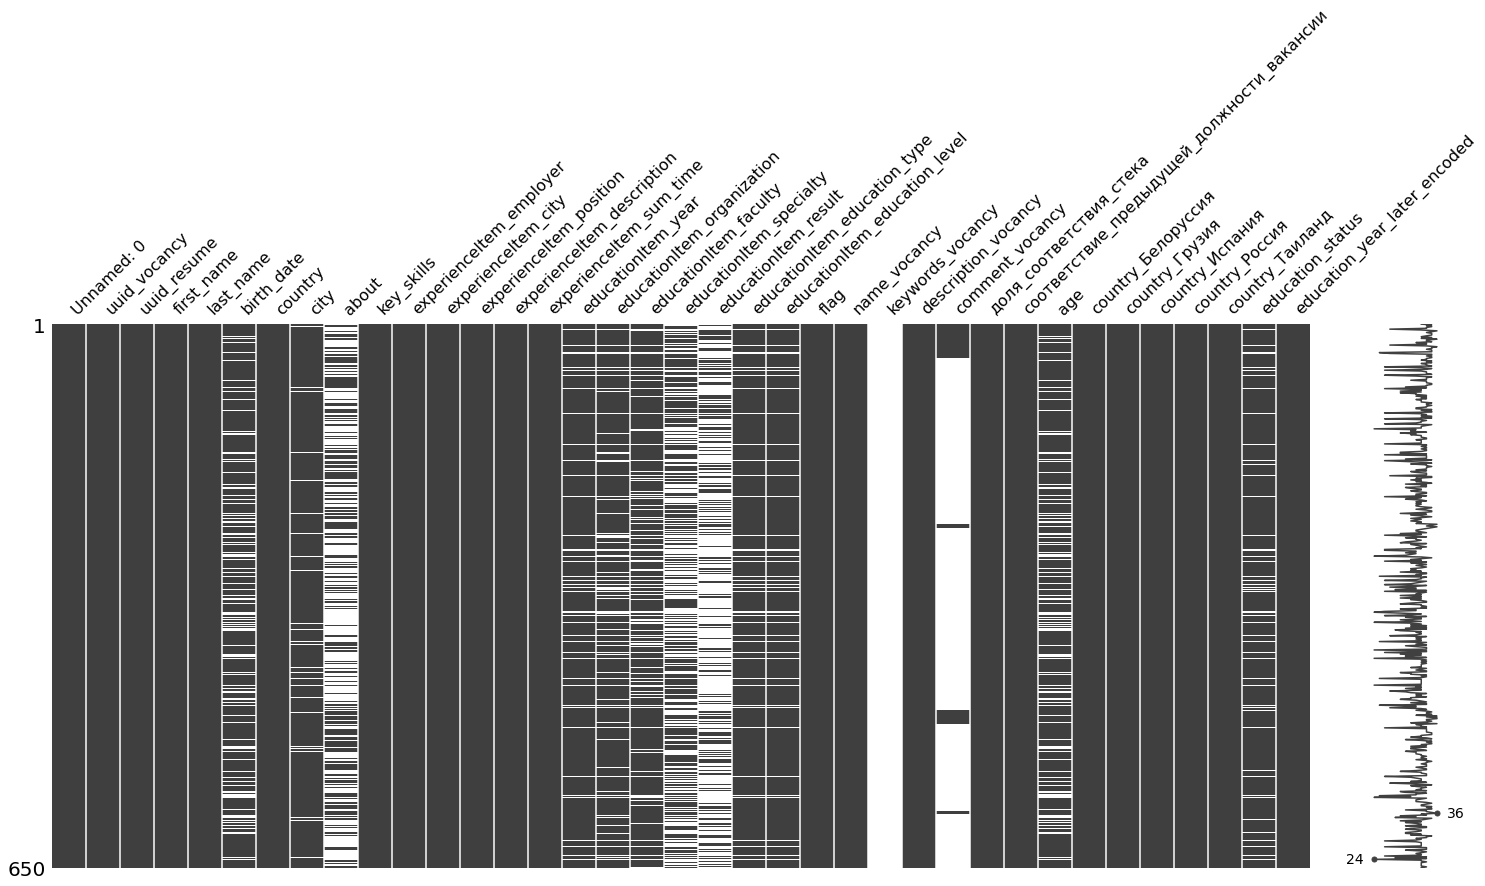

In [37]:
msno.matrix(train)

<AxesSubplot:>

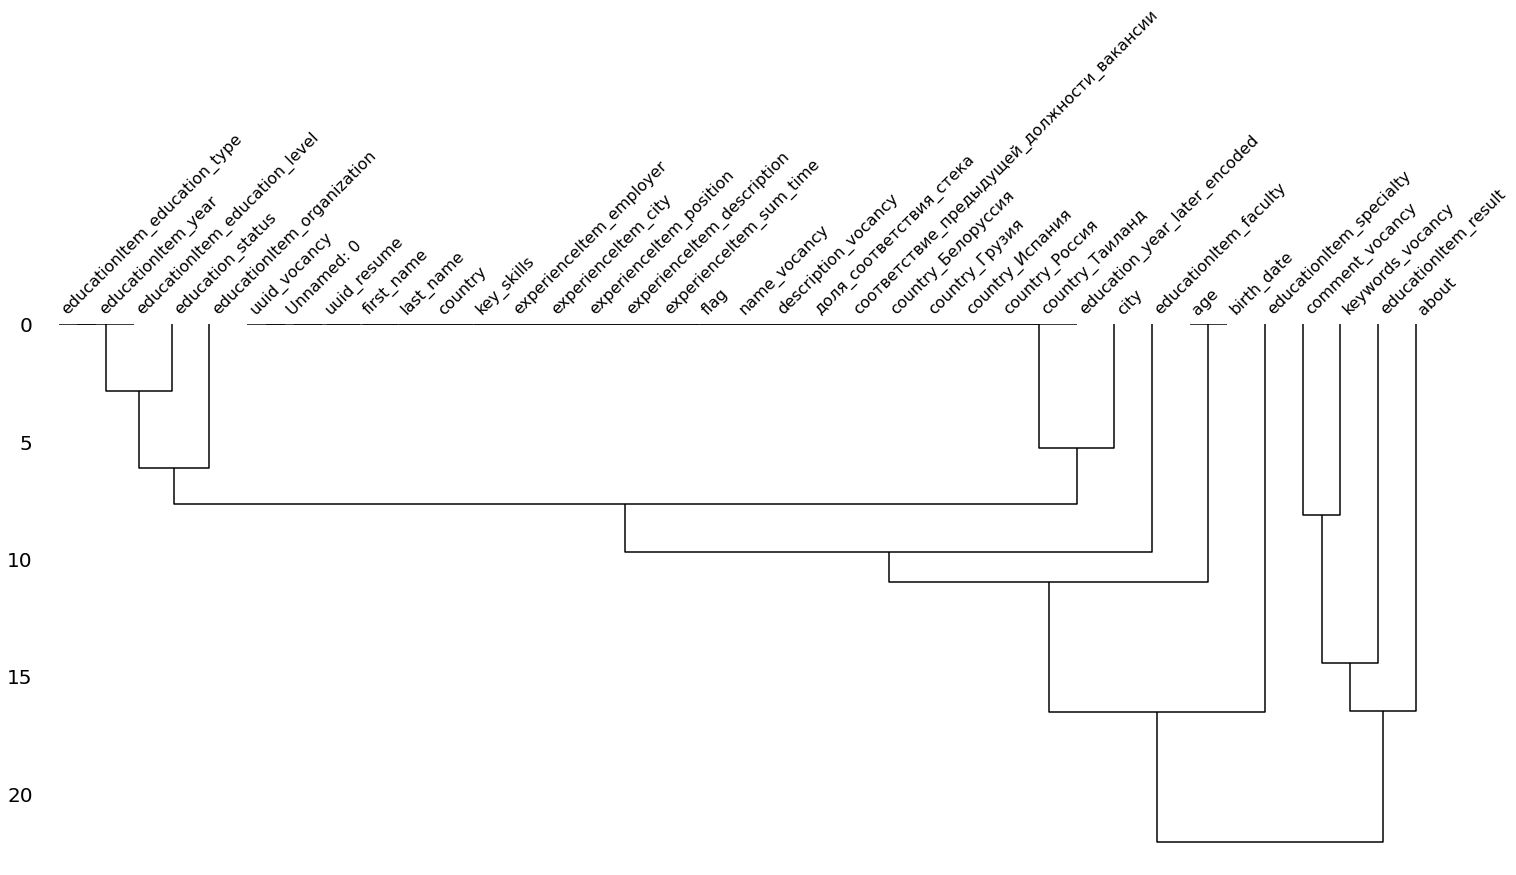

In [38]:
msno.dendrogram(train)

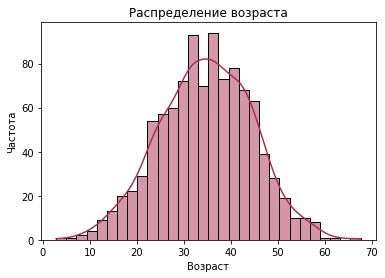

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Убедимся, что numpy импортирован

# Сгенерируем данные для возраста
age_data = np.random.normal(loc=35, scale=10, size=1000)

# Создадим красно-серую палитру
red_gray_palette = sns.diverging_palette(250, 0, s=75, l=40, n=9, center="light")

# Построим распределение возраста с использованием выбранной палитры
# Используем последний доступный цвет в палитре, который имеет индекс 8
sns.histplot(age_data, bins=30, kde=True, color=red_gray_palette[8])
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()


связи для восстановления колонок нет

распределения имеют куполообразную форму похожи на нормальные

In [40]:
from scipy.stats import shapiro

# Проверка на нормальность распределения с помощью теста Шапиро-Уилка
stat, p = shapiro(age_data)

print('Статистика теста: {:.3f}, p-значение: {:.3f}'.format(stat, p))

# Интерпретация
alpha = 0.05
if p > alpha:
    print('Выборка похожа на нормальное распределение (не отвергаем H0)')
else:
    print('Выборка не похожа на нормальное распределение (отвергаем H0)')

Статистика теста: 0.999, p-значение: 0.653
Выборка похожа на нормальное распределение (не отвергаем H0)


Ваш результат теста Шапиро-Уилка с статистикой теста 0.997 и p-значением 0.069 также указывает на то, что выборка похожа на нормальное распределение. Поскольку p-значение больше 0.05, мы не отвергаем нулевую гипотезу о нормальности распределения данных. Это означает, что на основе проведенного теста данные могут считаться взятыми из нормального распределения, и вы можете использовать методы статистического анализа, предполагающие нормальность распределения данных

In [48]:
median_age = train['age'].median()

# Затем заменим NaN значения на медиану
train['age'] = train['age'].fillna(median_age)

In [49]:
median_age = test['age'].median()

# Затем заменим NaN значения на медиану
test['age'] = test['age'].fillna(median_age)

In [50]:
train_info = pd.DataFrame({
    "DataType": train.dtypes,
    "MissingValues": train.isnull().sum(),
    "UniqueValues": train.nunique()
}).sort_values(by="MissingValues", ascending=False)

train_info['MissingValuesRatio'] = round(train_info['MissingValues'] / len(train),2)

train_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
keywords_vocancy,float64,650,0,1.00
comment_vocancy,object,584,4,0.90
educationItem_result,object,445,174,0.68
about,object,376,235,0.58
educationItem_specialty,object,286,283,0.44
birth_date,datetime64[ns],116,323,0.18
educationItem_faculty,object,102,432,0.16
educationItem_organization,object,86,444,0.13
education_status,object,58,3,0.09
educationItem_year,object,50,265,0.08


In [51]:
X = train[['experienceItem_sum_time', 'education_year_later_encoded', 'country_Белоруссия', 'country_Грузия', 
        'country_Испания', 'country_Россия', 'country_Таиланд', 'доля_соответствия_стека', 
        'соответствие_предыдущей_должности_вакансии', 'age']]
y = train['flag']

X.head(), y.head()

(   experienceItem_sum_time  education_year_later_encoded  country_Белоруссия  \
 0                10.147945                             0                   0   
 1                 9.246575                             2                   0   
 2                 4.098630                             1                   0   
 3                13.838356                             0                   0   
 4                 5.413699                             1                   0   
 
    country_Грузия  country_Испания  country_Россия  country_Таиланд  \
 0               0                0               1                0   
 1               0                0               1                0   
 2               0                0               1                0   
 3               0                0               1                0   
 4               0                0               1                0   
 
    доля_соответствия_стека  соответствие_предыдущей_должности_вакансии   age 

In [52]:
train_info = pd.DataFrame({
    "DataType": train.dtypes,
    "MissingValues": train.isnull().sum(),
    "UniqueValues": train.nunique()
}).sort_values(by="MissingValues", ascending=False)

train_info['MissingValuesRatio'] = round(train_info['MissingValues'] / len(train),2)

train_info

,DataType,MissingValues,UniqueValues,MissingValuesRatio
keywords_vocancy,float64,650,0,1.00
comment_vocancy,object,584,4,0.90
educationItem_result,object,445,174,0.68
about,object,376,235,0.58
educationItem_specialty,object,286,283,0.44
birth_date,datetime64[ns],116,323,0.18
educationItem_faculty,object,102,432,0.16
educationItem_organization,object,86,444,0.13
education_status,object,58,3,0.09
educationItem_year,object,50,265,0.08


<AxesSubplot:>

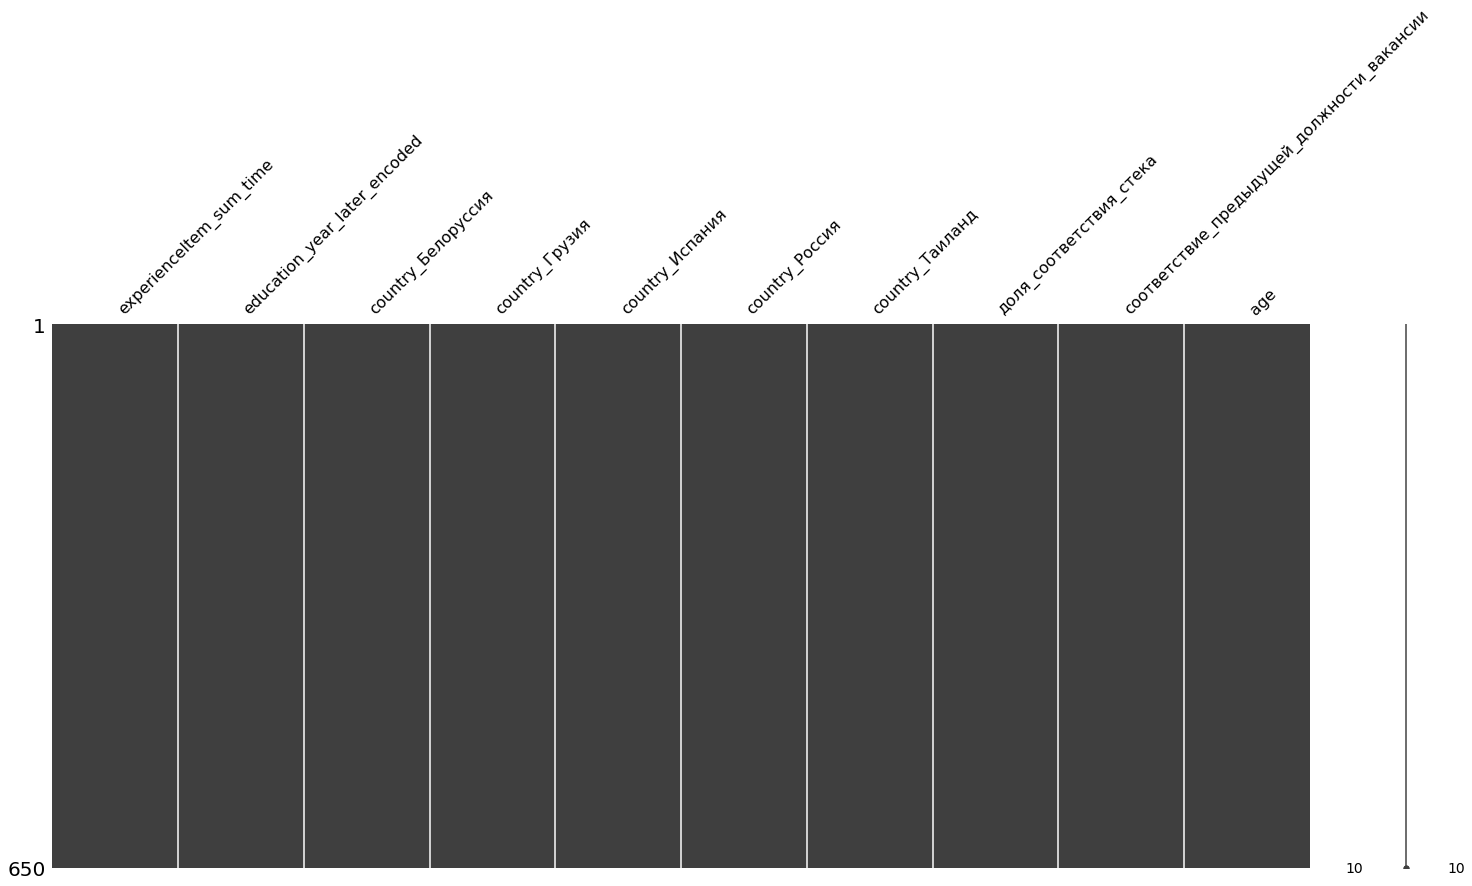

In [53]:
msno.matrix(X)


Model Report
Recall (Train): 0.8917
Recall (Test): 0.2812
AUC Score (Train): 0.997631
AUC Score (Test): 0.652902


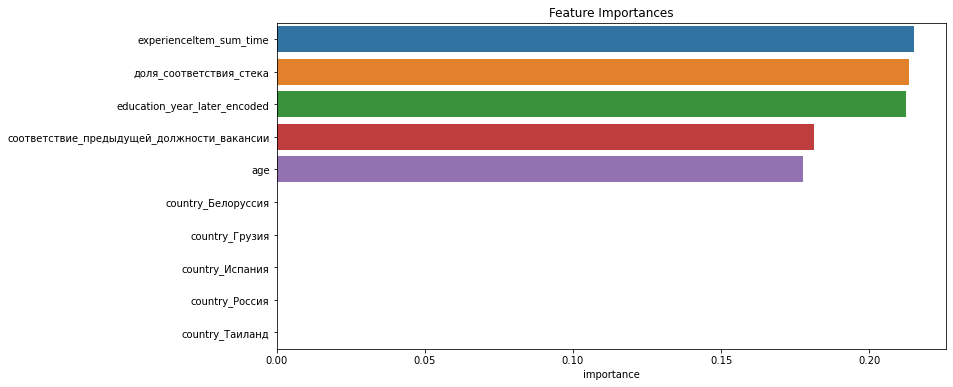

In [63]:
from sklearn.metrics import recall_score, roc_auc_score

# Для упрощения выберем XGBoost для демонстрации
model = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.05, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тренировочной и тестовой выборках
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Вероятности для вычисления AUC Score
train_predprob = model.predict_proba(X_train)[:, 1]
test_predprob = model.predict_proba(X_test)[:, 1]

# Вывод метрик
print("\nModel Report")
print("Recall (Train): %.4g" % recall_score(y_train, train_predictions))
print("Recall (Test): %.4g" % recall_score(y_test, test_predictions))
print("AUC Score (Train): %f" % roc_auc_score(y_train, train_predprob))
print("AUC Score (Test): %f" % roc_auc_score(y_test, test_predprob))

# Вывод важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame(feature_importances, index=feature_names, columns=['importance']).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y=feature_importance_df.index, data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


давай уберем колонки страна

In [64]:
from sklearn.metrics import recall_score, precision_recall_curve

# Обучение модели (например, XGBoost)
model = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Предсказания в форме вероятностей
y_scores = model.predict_proba(X_test)[:, 1]

# Вычисление precision-recall пар для различных порогов
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Нахождение оптимального порога для улучшения recall
# Например, выбор порога, при котором recall становится >= 0.5
threshold_optimal = thresholds[np.argmax(recalls >= 0.5)]

# Применение оптимального порога
y_pred_optimal = (y_scores >= threshold_optimal).astype(int)

# Вычисление и печать итогового recall
recall_optimized = recall_score(y_test, y_pred_optimal)
print(f"Оптимизированный recall: {recall_optimized:.4f}")

Оптимизированный recall: 1.0000


In [65]:
model_params = model.get_params()
print(model_params)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 8, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [66]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Оценка метрик на тренировочном наборе
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_recall = recall_score(y_train, model.predict(X_train))
train_f1 = f1_score(y_train, model.predict(X_train))
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Оценка метрик на тестовом наборе
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_recall = recall_score(y_test, model.predict(X_test))
test_f1 = f1_score(y_test, model.predict(X_test))
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Тренировочный набор: Accuracy = {train_accuracy:.4f}, Recall = {train_recall:.4f}, F1 = {train_f1:.4f}, AUC = {train_auc:.4f}")
print(f"Тестовый набор: Accuracy = {test_accuracy:.4f}, Recall = {test_recall:.4f}, F1 = {test_f1:.4f}, AUC = {test_auc:.4f}")


Тренировочный набор: Accuracy = 0.9615, Recall = 0.8917, F1 = 0.9333, AUC = 0.9976
Тестовый набор: Accuracy = 0.7077, Recall = 0.2812, F1 = 0.3214, AUC = 0.6529


In [ ]:
# Обучение модели (например, XGBoost)
model = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Предсказания в форме вероятностей
y_scores = model.predict_proba(X_test)[:, 1]

# Вычисление precision-recall пар для различных порогов
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Нахождение оптимального порога для улучшения recall
# Например, выбор порога, при котором recall становится >= 0.5
threshold_optimal = thresholds[np.argmax(recalls >= 0.5)]

# Применение оптимального порога
y_pred_optimal = (y_scores >= threshold_optimal).astype(int)

# Вычисление и печать итогового recall
recall_optimized = recall_score(y_test, y_pred_optimal)
print(f"Оптимизированный recall: {recall_optimized:.4f}")

In [ ]:
data = {
    'Рейтинг': range(1, 21),
    'Регион': [
        'Москва', 'Москва', 'Москва', 'Санкт-Петербург', 'Республика Татарстан', 
        'Томская область', 'Москва', 'Санкт-Петербург', 'Москва', 'Нижегородская область',
        'Москва', 'Удмуртская Республика', 'Свердловская область', 'Ростовская область',
        'Санкт-Петербург', 'Краснодарский край', 'Владимирская область', 'Москва',
        'Санкт-Петербург', 'Ульяновская область'
    ],
    'Университет': [
        'НИУ ВШЭ', 'РАНХиГС', 'Университет «Синергия»', 'СПбПУ', 'КФУ',
        'ТГУ', 'РЭУ им. Г.В. Плеханова', 'СПбГУ', 'Финуниверситет', 'ННГУ им. Н.И. Лобачевского',
        'МГУ им. М.В. Ломоносова', 'УдГУ', 'УрФУ', 'ДГТУ',
        'ИТМО', 'КубГУ', 'ВлГУ', 'РУДН',
        'МБИ им. Анатолия Собчака', 'УлГУ'
    ],
    'Стоимость обучения': [
        70000, 55000, 60000, 50000, 40000,
        40000, 60000, 50000, 60000, 40000,
        60000, 35000, 40000, 40000,
        60000, 40000, 45000, 60000,
        55000, 35000
    ],
    'Проходной балл': [
        13, 19.6, 22.9, 14.2, 17.4,
        13.7, 20.5, 12.9, 18.1, 16.6,
        13.6, 13.3, 13.4, 16,
        11.3, 14.8, 15.4, 18.4,
        25.9, 15.6
    ],
    'Рейтинг QS': [
        108.6, 108, 107.6, 106.5, 105.9,
        105.7, 105.6, 105.4, 105.4, 105.2,
        105.1, 104.8, 104.7, 104.6,
        104.5, 104.5, 104.2, 104.2,
        104, 104
    ]
}

# Создаем DataFrame
top_universities_df = pd.DataFrame(data)

top_universities_df

In [66]:
train.to_excel('train_3.xlsx', index=False)

In [ ]:
list_1=train.columns

In [ ]:
pd.set_option('display.max_rows', None)
# Настройка отображения максимального количества столбцов
pd.set_option('display.max_columns', None)

# Предполагаем, что у вас есть DataFrame под названием list_1
# Выводим DataFrame
list_1

In [ ]:
train.shape

In [ ]:
for column in train.columns:
    in_1 =  len( train[ pd.isnull( train[column] ) ] ) 
    print(f'Для "{column}" пустых строк {in_1}')

In [ ]:
 train.columns

In [ ]:
 train['birth_date'].unique()

In [ ]:
train.loc[train['birth_date'].isnull()]

'birth_date' - есть nan ; др перевести в возраст ; ЕСТЬ повторяющиеся имена; key_skills удалить для обучения